1- Do more restaurants provide online delivery compared to offline services?


2- Which types of restaurants are most favored by the general public?


3- What price range do couples prefer for each restaurant type?


4- What a makes a restaurant rating high in each type, is it the pricing, online services, or other factors.


5- What is the most popular type of restaurant.

6- Do restaurant with table booking online service perform better in rating and are more popular ?

7- What affects the popularity of a restaurant, explore the factors

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
path= 'Zomato-data-.csv'
data= pd.read_csv(path)
print(data.shape, data.dtypes)

(148, 7) name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object


In [3]:
df= data.copy()

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
#checking for missing values
df.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [7]:
df['listed_in(type)'].value_counts()

Dining    110
Cafes      23
other       8
Buffet      7
Name: listed_in(type), dtype: int64

In [12]:
#1- Do more restaurants provide online delivery compared to offline services?
df['online_order'].value_counts(normalize= True).round(2)

No     0.61
Yes    0.39
Name: online_order, dtype: float64

count     148.00
mean      264.81
std       653.68
min         0.00
25%         6.75
50%        43.50
75%       221.75
max      4884.00
Name: votes, dtype: float64


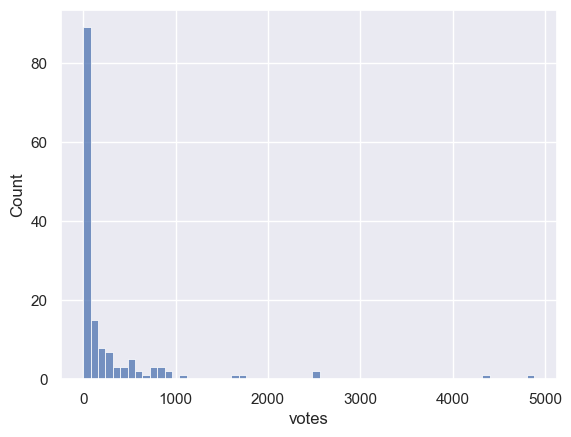

In [17]:
#checking the dist of the votes
plt.figure()
print(df['votes'].describe().round(2))
sns.histplot(data= df, x= 'votes')
plt.show()

In [18]:
# changing the rate type to float,
float_rate= lambda x: float(x[:-2])
df['rate']= df['rate'].apply(float_rate)

(array([ 1.,  9.,  9., 21., 18., 26., 30., 21.,  9.,  4.]),
 array([2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6]),
 <BarContainer object of 10 artists>)

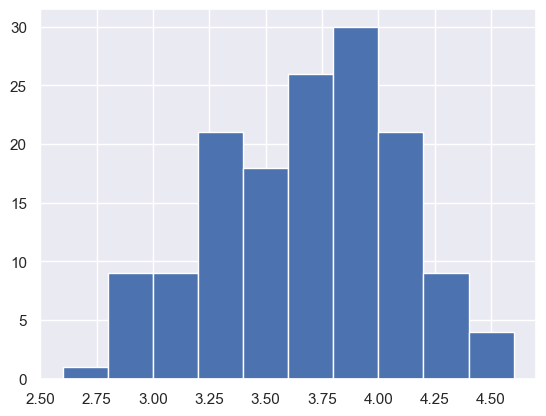

In [23]:
plt.hist(df['rate'])

<Figure size 640x480 with 0 Axes>

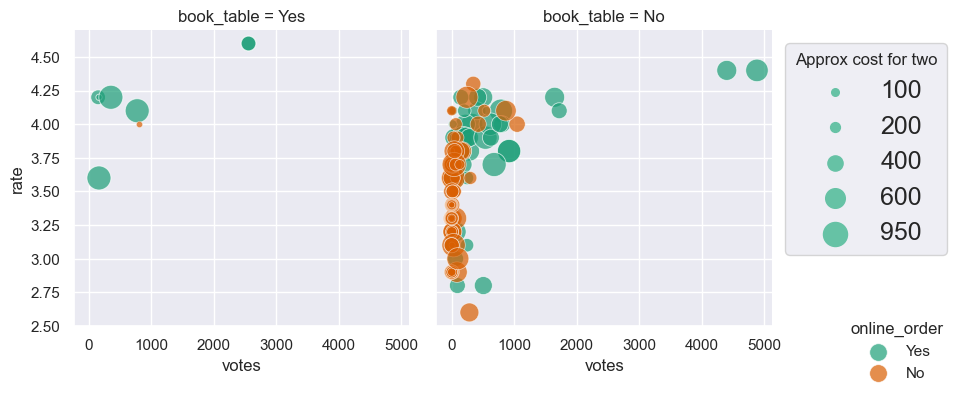

In [ ]:
# its seems no, could be because technology is new to some of them, 
# will explore whether that has an effect on the rating/popularity
plt.figure()
a= sns.FacetGrid(data= df, hue= 'online_order', col= 'book_table', palette= 'Dark2', height= 4, aspect= 1)
a.map_dataframe(sns.scatterplot, x= 'votes', y= 'rate', alpha= .7, size= 'approx_cost(for two people)', sizes= (20,300), legend= False)
a.add_legend(loc= 'lower right')
light_green = "#66c2a5"
size_vals = df["approx_cost(for two people)"].quantile([0, 0.25, 0.5, 0.75, 1])
size_handles = [
    plt.scatter([], [], s=30, label=f"{int(size_vals.iloc[0])}", color=light_green),
    plt.scatter([], [], s=50, label=f"{int(size_vals.iloc[1])}", color=light_green),
    plt.scatter([], [], s=120, label=f"{int(size_vals.iloc[2])}", color=light_green),
    plt.scatter([], [], s=200, label=f"{int(size_vals.iloc[3])}", color=light_green),
    plt.scatter([], [], s=300, label=f"{int(size_vals.iloc[4])}", color=light_green)
]

plt.legend(handles=size_handles, title="Approx cost for two", loc="upper left", bbox_to_anchor= (1,1), prop= {'size':18})
plt.show()

#Inference:
- it seems that online order matters more than booking_table, it appears that it contributes to the popularity of the restaurant aswell regardless of the price, we'll check whether the
restaurant type also matters.

In [63]:
df['listed_in(type)'].value_counts()

Dining    110
Cafes      23
other       8
Buffet      7
Name: listed_in(type), dtype: int64

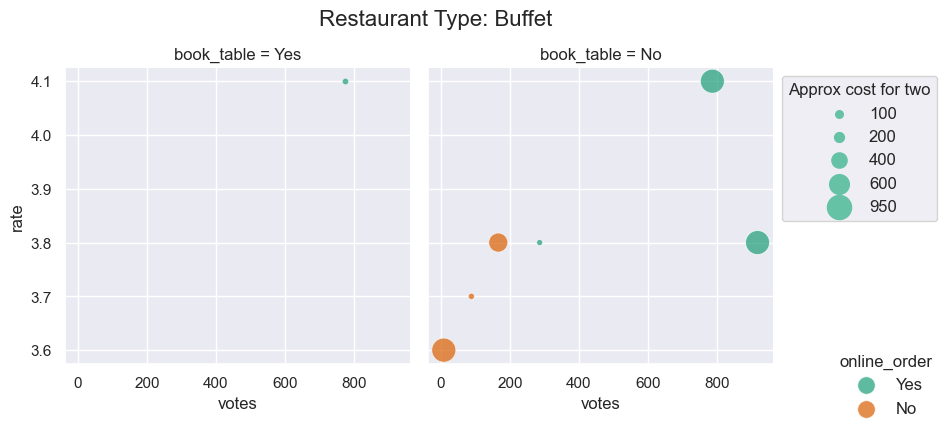

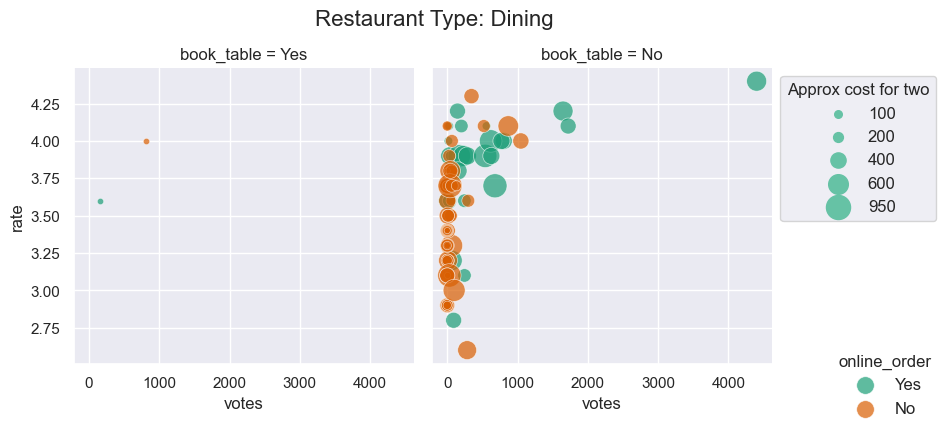

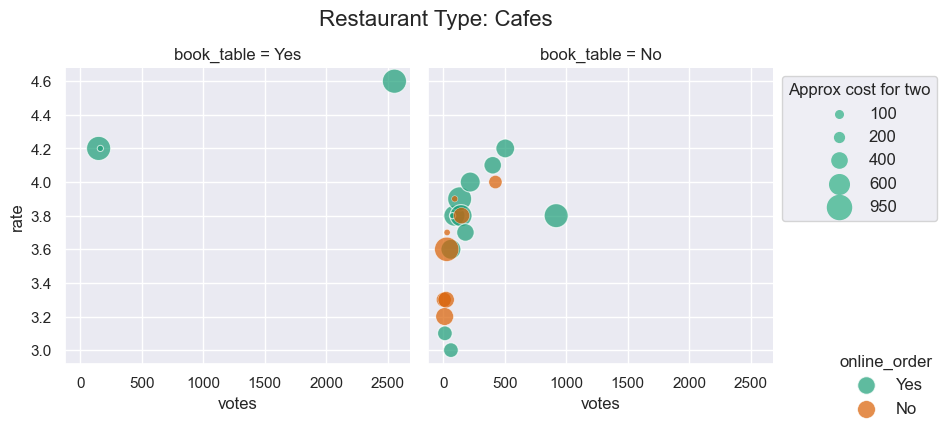

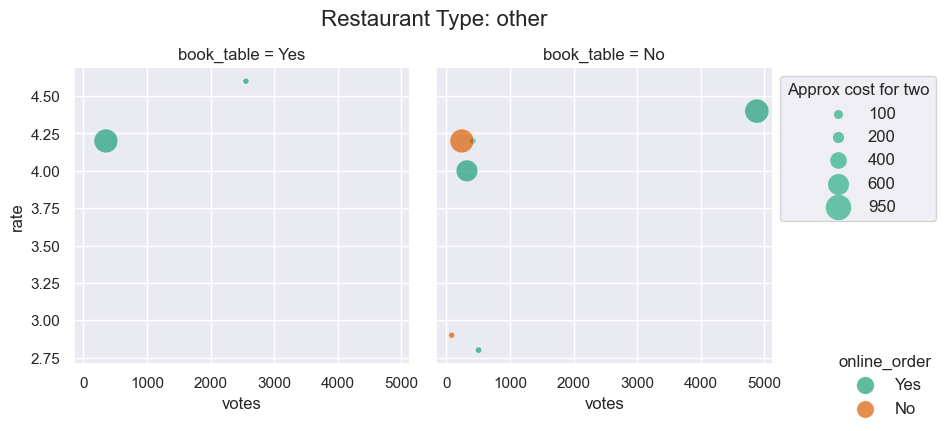

In [74]:
restaurant_types = ['Buffet','Dining','Cafes','other']
col_order = ['Yes', 'No']

for r_type in restaurant_types:
    df_sub = df[df['listed_in(type)'] == r_type]

    g = sns.FacetGrid(
        data=df_sub,
        hue='online_order',
        col='book_table',
        col_order=col_order,
        palette='Dark2',
        height=4,
        aspect=1
    )
    
    g.map_dataframe(
        sns.scatterplot,
        x='votes',
        y='rate',
        alpha=0.7,
        size='approx_cost(for two people)',
        sizes=(20,300),
        legend=False
    )
    
    g.add_legend(loc='lower right', prop={'size':12})

    # Custom size legend
    size_handles = [
        plt.scatter([], [], s=30, label=f"{int(size_vals.iloc[0])}", color=light_green),
        plt.scatter([], [], s=50, label=f"{int(size_vals.iloc[1])}", color=light_green),
        plt.scatter([], [], s=120, label=f"{int(size_vals.iloc[2])}", color=light_green),
        plt.scatter([], [], s=200, label=f"{int(size_vals.iloc[3])}", color=light_green),
        plt.scatter([], [], s=300, label=f"{int(size_vals.iloc[4])}", color=light_green)
    ]
    
    plt.legend(
        handles=size_handles,
        title="Approx cost for two",
        loc="upper left",
        bbox_to_anchor=(1,1),
        prop={'size':12}
    )
    
    plt.suptitle(f"Restaurant Type: {r_type}", fontsize=16, y=1.05)
    plt.show()


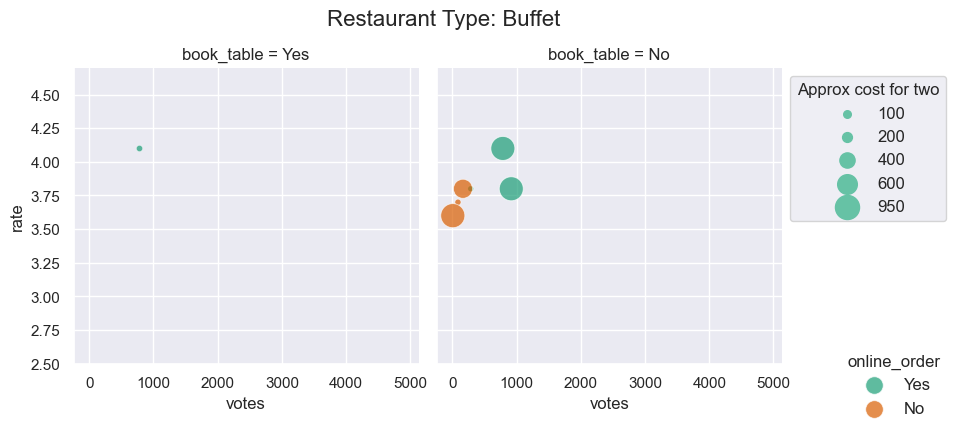

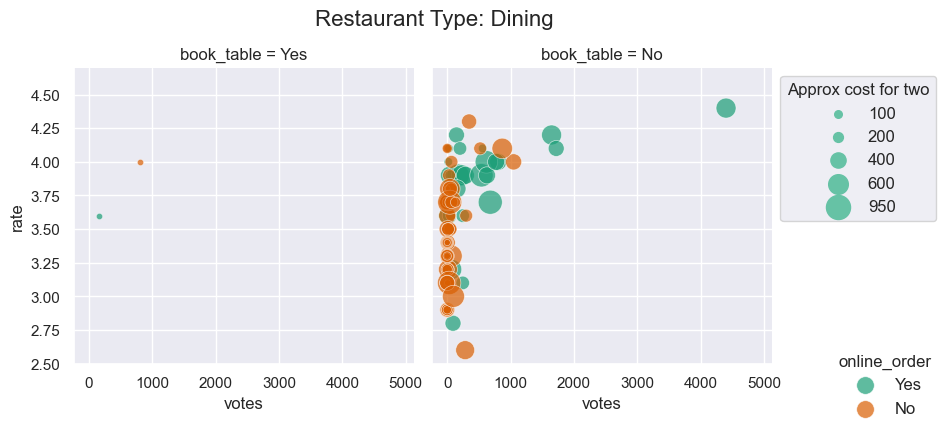

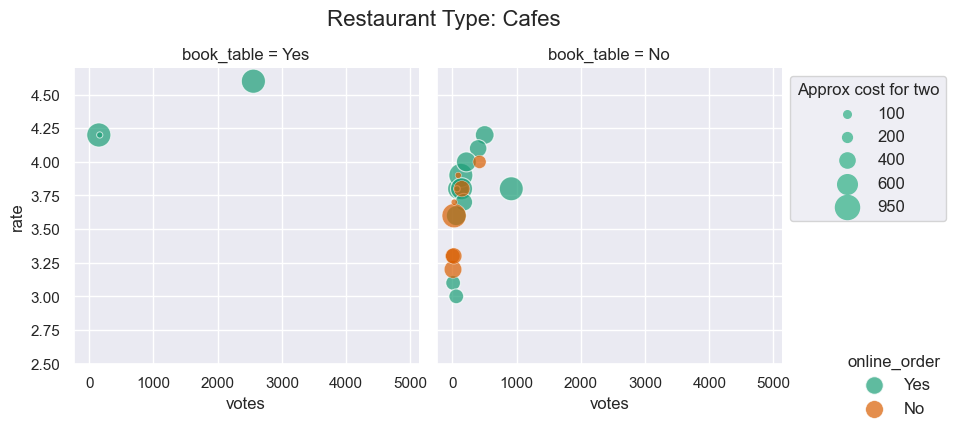

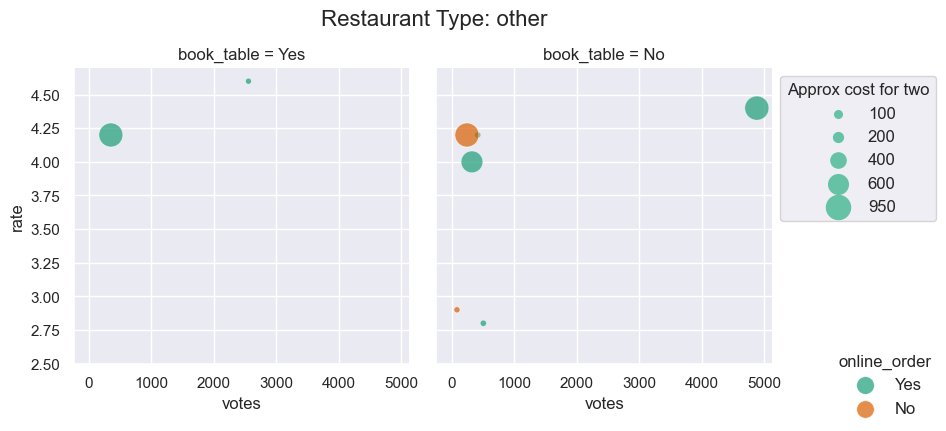

In [80]:
restaurant_types = ['Buffet','Dining','Cafes','other']
col_order = ['Yes', 'No']

# Compute global min/max for padding
x_min, x_max = df['votes'].min(), df['votes'].max()
y_min, y_max = df['rate'].min(), df['rate'].max()

# Add 5% padding
x_pad = (x_max - x_min) * 0.05
y_pad = (y_max - y_min) * 0.05

xlim = (max(-300, x_min - x_pad), x_max + x_pad)
ylim = (max(-.5, y_min - y_pad), y_max + y_pad)

for r_type in restaurant_types:
    df_sub = df[df['listed_in(type)'] == r_type]

    g = sns.FacetGrid(
        data=df_sub,
        hue='online_order',
        col='book_table',
        col_order=col_order,
        palette='Dark2',
        height=4,
        aspect=1,
        sharex=True,
        sharey=True
    )
    
    g.map_dataframe(
        sns.scatterplot,
        x='votes',
        y='rate',
        alpha=0.7,
        size='approx_cost(for two people)',
        sizes=(20,300),
        legend=False
    )

    # Set consistent axes with padding
    g.set(xlim=xlim, ylim=ylim)

    # --- Hue legend with uniform marker size ---
    g.add_legend(loc='lower right', prop={'size':12})

    # --- Size legend ---
    size_handles = [
        plt.scatter([], [], s=30, label=f"{int(size_vals.iloc[0])}", color=light_green),
        plt.scatter([], [], s=50, label=f"{int(size_vals.iloc[1])}", color=light_green),
        plt.scatter([], [], s=120, label=f"{int(size_vals.iloc[2])}", color=light_green),
        plt.scatter([], [], s=200, label=f"{int(size_vals.iloc[3])}", color=light_green),
        plt.scatter([], [], s=300, label=f"{int(size_vals.iloc[4])}", color=light_green)
    ]
    
    plt.legend(
        handles=size_handles,
        title="Approx cost for two",
        loc="upper left",
        bbox_to_anchor=(1,1),
        prop={'size':12}
    )

    plt.suptitle(f"Restaurant Type: {r_type}", fontsize=16, y=1.05)
    plt.show()


In [88]:
mask_low_d= (df['votes'] < 1000)  & (df['book_table'] == 'No') & (df['listed_in(type)'] == 'Dining')
mask_high_d= (df['votes'] > 1000) & (df['book_table'] == 'No') & (df['listed_in(type)'] == 'Dining')
mask_low_c= (df['votes'] < 1000)  & (df['book_table'] == 'No') & (df['listed_in(type)'] == 'Cafes')
mask_high_c= (df['votes'] > 1000) & (df['book_table'] == 'No') & (df['listed_in(type)'] == 'Cafes')

print('mean cost for unpopular restaurants, No table_order service, Dining type:',df[mask_low_d]['approx_cost(for two people)'].mean().round(2))
print('mean cost for popular restaurants, No table_order service, Dining type:',df[mask_high_d]['approx_cost(for two people)'].mean().round(2))

print('mean cost for unpopular restaurants, No table_order service, Cafes type:',df[mask_low_c]['approx_cost(for two people)'].mean().round(2))
print('mean cost for popular restaurants, No table_order service, Cafes type:',df[mask_high_c]['approx_cost(for two people)'].mean())

mean cost for unpopular restaurants, No table_order service, Dining type: 342.31
mean cost for popular restaurants, No table_order service, Dining type: 512.5
mean cost for unpopular restaurants, No table_order service, Cafes type: 542.5
mean cost for popular restaurants, No table_order service, Cafes type: nan


What makes a restaurant popular is a mix of different factors:

1- type of rest

2- online-order service

3- cost approx for two people

1 -> Type of rest:
    - it appears that Dining type restaurants are more common and therefore on avg have the highest customers count, followed by cafes
    - also dining restaurants are more popular than their peers followed by cafes, from that
    we can say that the best option for a brand new restaurant is to be of type Dining > cafes.

2 -> online-oder service: from our study we conclude the importance of online order
    service to be high, regardless of the restaurant type or its average price or the book_table service, 
    - online-order service is too important to ignore, those with oos perform way better in sales, ratings, and are also popular, this is due to the flexibility such restaurants offer, people don't have to wait in line, or leave their homes in bad conditions, it could also mean that most customers have families and online order allows them to eat at the comfort of their homes.
    - it could also mean that many people have gotten used to online ordering, from products to other services, so adding that to restaurant seems to make more sense.
    - one more speculation as to why online listed restaurant seems to perform better and are more popular, could be because of the rise of social media and the applications that list the food that these restaurants provide, and allows people to talk about them and discuss them, all using their phones, which reduces the risk of ordering something and not liking it, from unknown (not listed restaurant).

3 -> cost: 
    - the cost that is most appealing to people appears to be between 450 - 560 per two people, with 560 being the most adopted in the popular restaurant.
    for Dining type: 340 - 520,
    for Cafes type: 540 on avg

4 -> Final notes:
    we conclude by saying restaurants in dining and cafes are the easiest to succeed in, as long as you list your restaurant online, and provide online_ordering service, and keep your prices within the average bound.
    there are some exceptions ofc in buffet and other types, but succeeding there is a challenge, and from that data we see that even succeeding there might not exceed the popularity and the costumer base of the dining type restaurant.